In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train_exit.csv")

# EDA AND PREPROCESSING

In [3]:
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [4]:
# Displaying basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [5]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [6]:
# Checking for missing values

data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [7]:
# Handle missing values for categorical variables

data['gender'].fillna(data['gender'].mode()[0], inplace=True)

In [8]:
# Removing 'lbs' from the 'weight' column

data['weight'] = data['weight'].str.replace('lbs', '')

# Converting the 'weight' column to float

data['weight'] = data['weight'].astype(float)

print(data['weight'].head())

0    176.0
1    148.0
2    172.0
3    165.0
4    158.0
Name: weight, dtype: float64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  float64
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [10]:
# Handle missing values for numerical variables

data['weight'].fillna(data['weight'].median(), inplace=True)
data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].median(), inplace=True)
data['jumping_skills'].fillna(data['jumping_skills'].median(), inplace=True)
data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].median(), inplace=True)
data['mental_strength'].fillna(data['mental_strength'].median(), inplace=True)
data['shot_accuracy'].fillna(data['shot_accuracy'].median(), inplace=True)
data['strong_foot'].fillna(data['strong_foot'].mode()[0], inplace=True)
data['behaviour_rating'].fillna(data['behaviour_rating'].median(), inplace=True)
data['matches_played'].fillna(data['matches_played'].median(), inplace=True)
data['fitness_rating'].fillna(data['fitness_rating'].median(), inplace=True)
data['coaching'].fillna(data['coaching'].mode()[0], inplace=True)
data['years_of_experience'].fillna(data['years_of_experience'].median(), inplace=True)

In [11]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13994 non-null  float64
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [13]:
data.describe()

,age,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,...,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000
mean,21.135844,165.602973,56.190224,61.934329,62.753323,63.612691,48.496784,56.770830,16.474632,48.108118,...,47.293483,62.652780,23.586094,5.825983,3.722452,6.425075,3.389095,6.429684,-4.740675,0.557525
std,5.162719,15.218375,16.559018,14.931963,14.203638,11.928480,15.750612,11.965881,16.874551,16.821929,...,15.487688,11.512526,5.194387,1.067959,13.282133,1.666258,1.709152,4.428210,72.023656,0.496698
min,16.000000,110.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,154.000000,52.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,...,39.000000,56.000000,21.100000,5.100000,0.000000,5.700000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,165.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,176.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,...,58.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,243.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


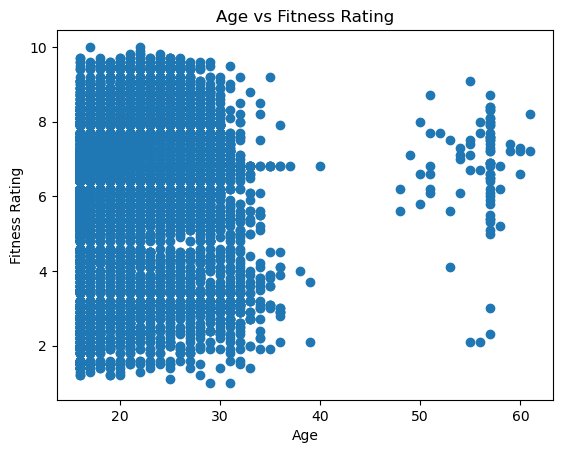

In [14]:
# Explore relationships between age vs fitness rating

plt.scatter(data['age'], data['fitness_rating'])
plt.xlabel('Age')
plt.ylabel('Fitness Rating')
plt.title('Age vs Fitness Rating')
plt.show()

In [15]:
numerical_features = ['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'jumping_skills', 
                       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills',
                       'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 
                       'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won',
                       'years_of_experience', 'no_of_disqualifications']

C:\Users\USER\AppData\Local\Temp\ipykernel_24000\4022471487.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[numerical_features].corr()


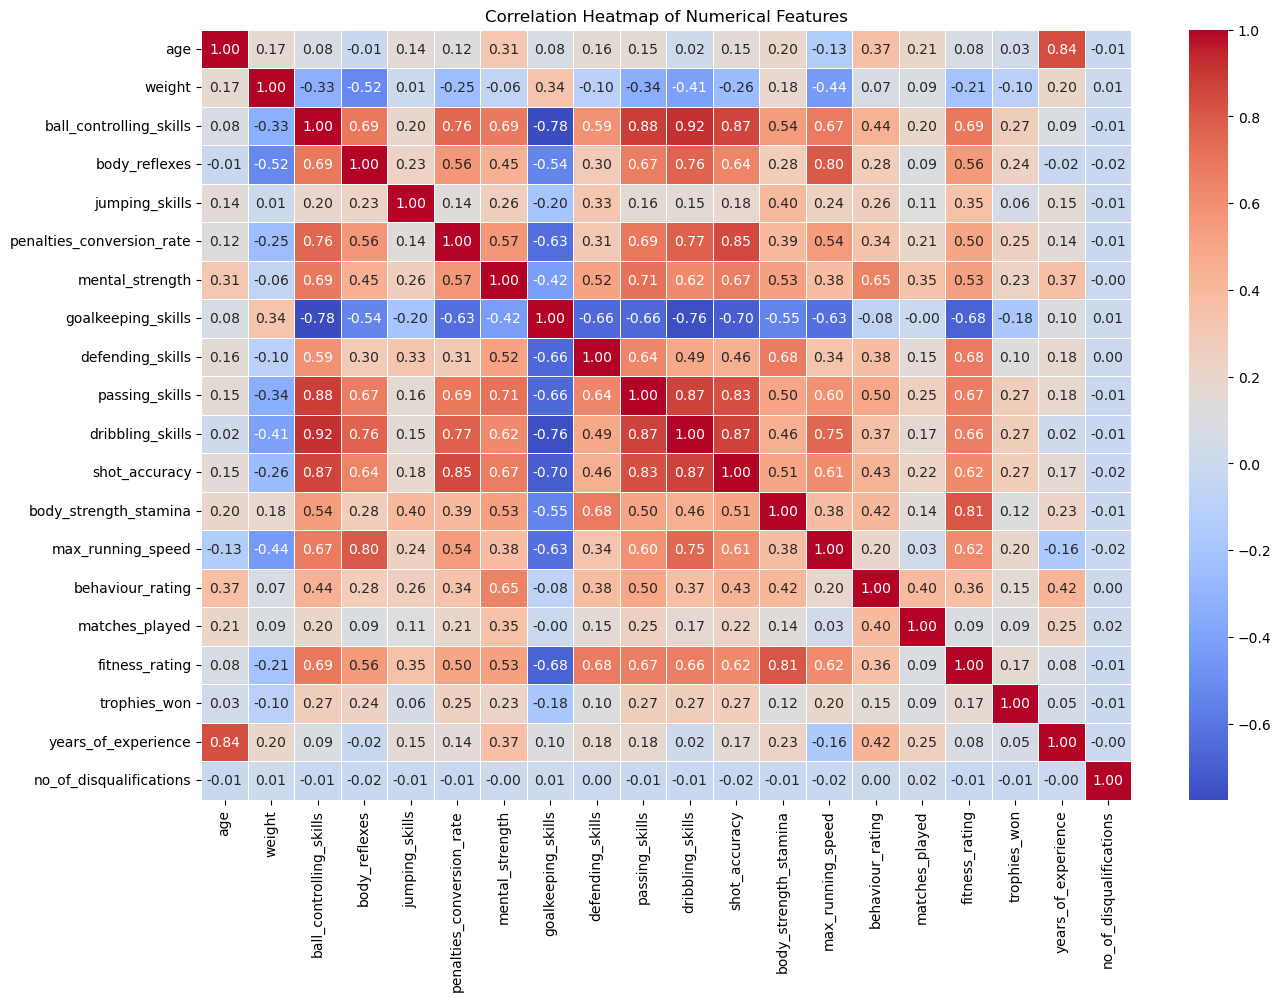

In [16]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Fitness rating and body strenght stamina is more correlated

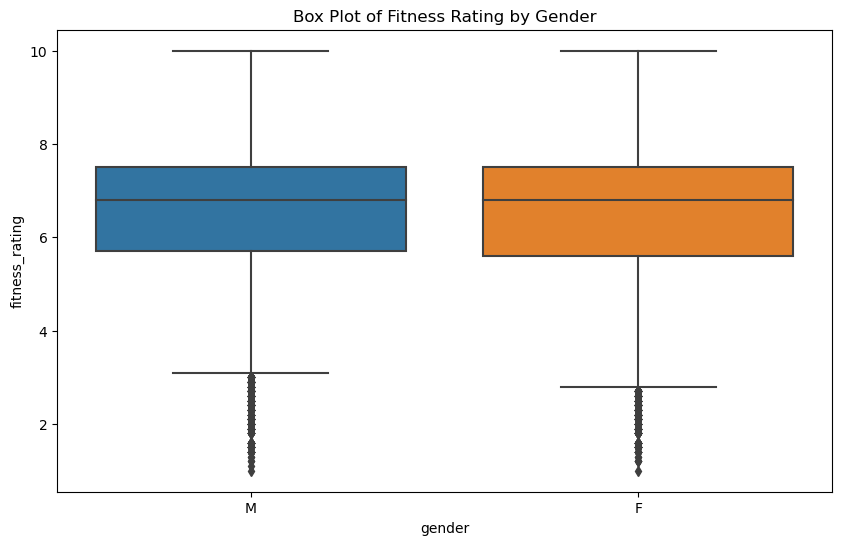

In [17]:
# Box plot for 'gender' vs 'fitness_rating'

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='fitness_rating', data=data)
plt.title('Box Plot of Fitness Rating by Gender')
plt.show()

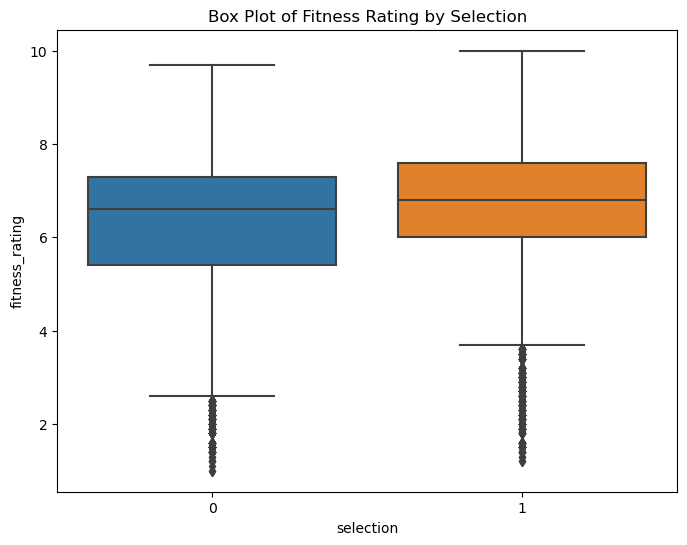

In [18]:
# Box plot for 'selection' vs 'fitness_rating'

plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='fitness_rating', data=data)
plt.title('Box Plot of Fitness Rating by Selection')
plt.show()

In [19]:
country_distribution = data['country'].value_counts().reset_index()
country_distribution.columns = ['Country', 'Number of Players']

In [20]:
country_distribution

,Country,Number of Players
0,England,1157
1,Germany,838
2,Spain,796
3,France,734
4,Argentina,691
...,...,...
158,New Caledonia,1
159,Afghanistan,1
160,Chad,1
161,Turkmenistan,1


# Modeling

In [21]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [22]:
data = data.drop('player_id', axis=1)

In [23]:
data = data.drop('name', axis=1)

In [24]:
# Encoding categorical variables

data_encoded = pd.get_dummies(data, columns=['gender', 'strong_foot', 'coaching', 'dedication_level','height','country'])

In [25]:
# Scaling numerical features

numerical_features = ['age', 'weight', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills',
                       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills',
                       'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
                       'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won',
                       'years_of_experience', 'no_of_disqualifications']

In [26]:
scaler = StandardScaler()
X_scaled = data_encoded.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

In [27]:
# Separate the target variable 'selection'

y = data['selection']
X = data.drop('selection', axis=1)

In [28]:
# Review the modified dataset

X_scaled.head

<bound method NDFrame.head of             age    weight  ball_controlling_skills  body_reflexes  \
0      0.361093  0.683213                 1.256748      -0.263493   
1     -0.607423 -1.156733                -0.132272       0.473208   
2     -0.994830  0.420364                -1.340117      -1.268085   
3      1.135906 -0.039623                 1.377533       0.741099   
4     -0.413720 -0.499609                -0.555018      -0.062575   
...         ...       ...                      ...            ...   
13989 -0.220017 -0.302472                 0.230081      -0.933221   
13990 -0.607423 -0.039623                -0.192665       0.406235   
13991 -0.801127  0.420364                -0.011488       0.741099   
13992 -0.220017 -1.025309                 0.894395       0.473208   
13993 -0.994830 -0.433897                -0.192665      -0.196520   

       body_balance  jumping_skills  penalties_conversion_rate  \
0         -1.109144       -0.386709                  -0.475985   
1        

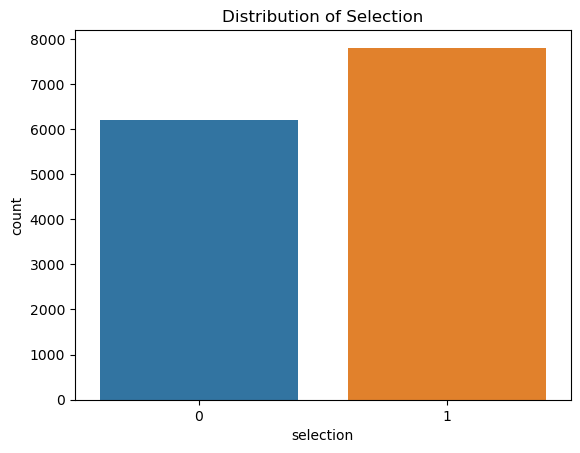

In [29]:
# Explore the distribution of the target variable 'selection'
sns.countplot(x='selection', data=data)
plt.title('Distribution of Selection')
plt.show()

In [30]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the model

model = RandomForestClassifier()

In [32]:
# Train the model

model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Make predictions on the test set

predictions = model.predict(X_test)

In [34]:
# Print classification report and confusion matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       1.00      1.00      1.00      1513

    accuracy                           1.00      2799
   macro avg       1.00      1.00      1.00      2799
weighted avg       1.00      1.00      1.00      2799



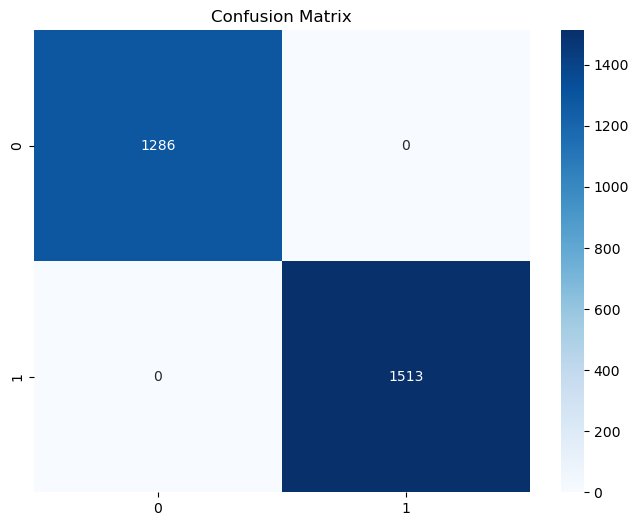

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Fine-tuning

In [41]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [42]:
# Initialize the model
model = RandomForestClassifier()

In [43]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [44]:
# Evaluate the model with the best parameters

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {accuracy}")

Best Model Accuracy: 1.0
